# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [27]:
# Import the required libraries and dependencies
import os
import requests as req
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [28]:
# Load the environment variables from the .env file
#by calling the load_dotenv functionfrom dotenv import load_dotenv

from dotenv import load_dotenv
load_dotenv('ALPACA.env')

Python-dotenv could not parse statement starting at line 4


True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [29]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [54]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [55]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [56]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = req.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=3))


{
   "data": {
      "1": {
         "id": 1,
         "name": "Bitcoin",
         "symbol": "BTC",
         "website_slug": "bitcoin",
         "rank": 1,
         "circulating_supply": 19366537,
         "total_supply": 19366537,
         "max_supply": 21000000,
         "quotes": {
            "USD": {
               "price": 28988.0,
               "volume_24h": 12585139310,
               "market_cap": 561377060925,
               "percentage_change_1h": 0.149323006536875,
               "percentage_change_24h": 1.63919561647392,
               "percentage_change_7d": -0.788019476390729,
               "percent_change_1h": 0.149323006536875,
               "percent_change_24h": 1.63919561647392,
               "percent_change_7d": -0.788019476390729
            }
         },
         "last_updated": 1683473081
      }
   },
   "metadata": {
      "timestamp": 1683473081,
      "num_cryptocurrencies": 3119,
      "error": null
   }
}


In [57]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = req.get(eth_url).json()
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response,indent=3))

{
   "data": {
      "1027": {
         "id": 1027,
         "name": "Ethereum",
         "symbol": "ETH",
         "website_slug": "ethereum",
         "rank": 2,
         "circulating_supply": 120344575,
         "total_supply": 120344575,
         "max_supply": 120344575,
         "quotes": {
            "USD": {
               "price": 1922.93,
               "volume_24h": 7978575992,
               "market_cap": 231406595339,
               "percentage_change_1h": 0.469067929093486,
               "percentage_change_24h": 2.33987032859405,
               "percentage_change_7d": 0.926687009877947,
               "percent_change_1h": 0.469067929093486,
               "percent_change_24h": 2.33987032859405,
               "percent_change_7d": 0.926687009877947
            }
         },
         "last_updated": 1683473086
      }
   },
   "metadata": {
      "timestamp": 1683473086,
      "num_cryptocurrencies": 3119,
      "error": null
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [58]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current BTC price in USD is ${btc_price:.2f}")

The current BTC price in USD is $28988.00


In [59]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current ETH price in USD is ${eth_price:.2f}")

The current ETH price in USD is $1922.93


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [60]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"You have {btc_coins} BTC in your Portfolio.\nYour current BTC holdings value ${btc_value:.2f}")

You have 1.2 BTC in your Portfolio.
Your current BTC holdings value $34785.60


In [61]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price
 
# Print current value of your holding in ETH
print(f"You have {eth_coins} ETH in your Portfolio.\nYour current BTC holdings value in USD is ${eth_value:.2f}")


You have 5.3 ETH in your Portfolio.
Your current BTC holdings value in USD is $10191.53


In [62]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"You have {btc_coins+eth_coins} total crypto coins in your Portfolio.\nYour current Total Crypto holding's value in USD is ${total_crypto_wallet:.2f}")


You have 6.5 total crypto coins in your Portfolio.
Your current Total Crypto holding's value in USD is $44977.13


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [63]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [64]:
# Set the variables for the Alpaca API and secret keys
# Create the Alpaca tradeapi.REST object
from dotenv import load_dotenv
load_dotenv('ALPACA.env')

APCA_API_KEY_ID = os.getenv("APCA_API_KEY_ID")
APCA_API_SECRET_KEY = os.getenv("APCA_API_SECRET_KEY")


alpaca = tradeapi.REST(
    APCA_API_KEY_ID,
    APCA_API_SECRET_KEY,
    api_version="v2"
)

Python-dotenv could not parse statement starting at line 4


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [65]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY" , "AGG"]

# Set timeframe to 1Day

timeframe = "1D"


# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

start_date = pd.Timestamp("2023-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-04", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [66]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
ticker_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# # Separate ticker data
SPY = ticker_df[ticker_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = ticker_df[ticker_df['symbol']=='AGG'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
ticker_df = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])

# Review the first 5 rows of the Alpaca DataFrame
ticker_df.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-05-04 04:00:00+00:00  406.93  407.27  403.74  405.13  93756917   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2023-05-04 04:00:00+00:00      716760  405.493605  99.77  100.415  99.75   

                                                                
                           close   volume trade_count     vwap  
timestamp                                                       
2023-05-04 04:00:00+00:00  99.97  5262191       25183  100.098

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [67]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = float(ticker_df["AGG"]["close"])

# Print the AGG closing price
print(f"AGG closing price ${agg_close_price:.2f}")

AGG closing price $99.97


In [68]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(ticker_df["SPY"]["close"])

# Print the SPY closing price
print(f"SPY Closing Price  ${spy_close_price:.2f}")


SPY Closing Price  $405.13


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [69]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f" current value of the bond ${agg_value:.2f}")

 current value of the bond $19994.00


In [70]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f" current value of the stock portfolio ${spy_value:.2f}")

 current value of the stock portfolio $44564.30


In [71]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds =  agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Current balance of stocks and bonds ${total_stocks_bonds:.2f}")

Current balance of stocks and bonds $64558.30


In [72]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds
# Print current cryptocurrency wallet balance
print(f"Current balance of stocks and bonds ${total_portfolio:.2f}")

Current balance of stocks and bonds $109535.43


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [73]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]
# Review the Python list savings_data
savings_data   

[44977.129, 64558.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [74]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns=["amount"],
    index=["crypto", "stock/bonds"]
)
# Display the savings_df DataFrame
savings_df

,amount
crypto,44977.129
stock/bonds,64558.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'portfolio composition Crypto | stocks/Bonds'}, ylabel='amount'>

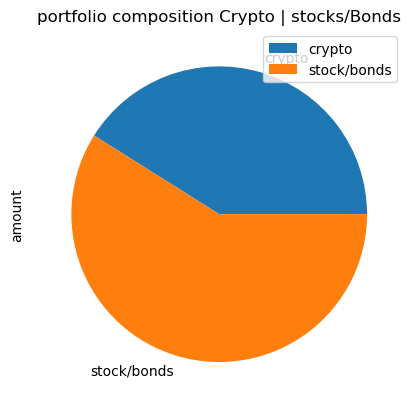

In [75]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="amount",title="portfolio composition Crypto | stocks/Bonds")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [76]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [77]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"congradulations! Your portfolio balance of ${total_portfolio:.2f}.You have enough money in the fund")
elif total_portfolio == emergency_fund_value:
    print(f"congradulations on achiving this goal! Your portfolio balance of ${total_portfolio:.2f}")
else:
      print(f"Your portfolio balance is ${total_portfolio:.2f}.You need ${total_portfolio - emergency_fund_value:.2f} more to reach your goal")
    

congradulations! Your portfolio balance of $109535.43.You have enough money in the fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.


#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [78]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date=pd.Timestamp("2020-05-05", tz="America/New_York").isoformat()
end_data = pd.Timestamp("2023-05-05", tz="America/New_York").isoformat()

In [79]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
financial_planner_df  = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = financial_planner_df[financial_planner_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = financial_planner_df[financial_planner_df['symbol']=='AGG'].drop('symbol', axis=1)
 
# Concatenate the ticker DataFrames
financial_planner_df = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])

# Display both the first and last five rows of the DataFrame
display(financial_planner_df.head())
display(financial_planner_df.tail())


SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2020-05-05 04:00:00+00:00  286.64  289.25  283.7134  286.15  79569939   
2020-05-06 04:00:00+00:00  288.05  288.46  283.7800  284.34  73632628   
2020-05-07 04:00:00+00:00  287.75  289.78  287.1300  287.70  75250412   
2020-05-08 04:00:00+00:00  291.09  292.95  289.8600  292.51  76622128   
2020-05-11 04:00:00+00:00  290.34  294.00  289.8800  292.62  79515876   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-05-05 04:00:00+00:00      459764  287.400201  116.96  116.97  116.810   
2020-05-06 04:00:00+00:00      436219  286.096273  116.44  116.71  116.300   
2020-05-07 04:00:00+00:00      422688  287.989956  116.61  116.77  116.420   
2020-05-08 04:00:00+00:00      385501  291.461960  116.68  116.76  116.350   
2020-05-11 04:00:00+00:00      419260  292.278175  116.40  116.43  116.065   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-05-05 04:00:00+00:00  116.88  4611519       15146  116.879640  
2020-05-06 04:00:00+00:00  116.41  6394949       20233  116.426742  
2020-05-07 04:00:00+00:00  116.77  3786651       15963  116.641826  
2020-05-08 04:00:00+00:00  116.46  3592658       15323  116.492159  
2020-05-11 04:00:00+00:00  116.10  5249607       16091  116.156165

SPY                                      \
                             open    high      low   close     volume   
timestamp                                                               
2023-04-28 04:00:00+00:00  411.49  415.93  411.430  415.93   84857179   
2023-05-01 04:00:00+00:00  415.47  417.62  415.265  415.51   62135864   
2023-05-02 04:00:00+00:00  414.77  414.82  407.820  410.84  104017961   
2023-05-03 04:00:00+00:00  411.36  413.87  407.770  408.02   91577386   
2023-05-04 04:00:00+00:00  406.93  407.27  403.740  405.13   93756917   

                                                     AGG                     \
                          trade_count        vwap   open      high      low   
timestamp                                                                     
2023-04-28 04:00:00+00:00      592226  414.377425  99.91   99.9900  99.7200   
2023-05-01 04:00:00+00:00      502911  416.206296  99.35   99.4100  98.5950   
2023-05-02 04:00:00+00:00      751349  411.073923  98.96   99.6700  98.9300   
2023-05-03 04:00:00+00:00      738928  410.586739  99.89  100.1336  99.6901   
2023-05-04 04:00:00+00:00      716760  405.493605  99.77  100.4150  99.7500   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-04-28 04:00:00+00:00   99.96   5314632       24244   99.898951  
2023-05-01 04:00:00+00:00   98.69  10631667       24231   99.028460  
2023-05-02 04:00:00+00:00   99.65   6085943       27615   99.514143  
2023-05-03 04:00:00+00:00  100.09   5637205       29320   99.951368  
2023-05-04 04:00:00+00:00   99.97   5262191       25183  100.098000

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [80]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.           
thirty_year_simulation = MCSimulation(
    portfolio_data=financial_planner_df,
    weights=[0.60, 0.40],
    num_simulation=500,
    num_trading_days=252*30,
)

# Review the simulation input data
thirty_year_simulation.portfolio_data.head()

SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2020-05-05 04:00:00+00:00  286.64  289.25  283.7134  286.15  79569939   
2020-05-06 04:00:00+00:00  288.05  288.46  283.7800  284.34  73632628   
2020-05-07 04:00:00+00:00  287.75  289.78  287.1300  287.70  75250412   
2020-05-08 04:00:00+00:00  291.09  292.95  289.8600  292.51  76622128   
2020-05-11 04:00:00+00:00  290.34  294.00  289.8800  292.62  79515876   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-05-05 04:00:00+00:00      459764  287.400201          NaN  116.96   
2020-05-06 04:00:00+00:00      436219  286.096273    -0.006325  116.44   
2020-05-07 04:00:00+00:00      422688  287.989956     0.011817  116.61   
2020-05-08 04:00:00+00:00      385501  291.461960     0.016719  116.68   
2020-05-11 04:00:00+00:00      419260  292.278175     0.000376  116.40   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2020-05-05 04:00:00+00:00  116.97  116.810  116.88  4611519       15146   
2020-05-06 04:00:00+00:00  116.71  116.300  116.41  6394949       20233   
2020-05-07 04:00:00+00:00  116.77  116.420  116.77  3786651       15963   
2020-05-08 04:00:00+00:00  116.76  116.350  116.46  3592658       15323   
2020-05-11 04:00:00+00:00  116.43  116.065  116.10  5249607       16091   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-05-05 04:00:00+00:00  116.879640          NaN  
2020-05-06 04:00:00+00:00  116.426742    -0.004021  
2020-05-07 04:00:00+00:00  116.641826     0.003093  
2020-05-08 04:00:00+00:00  116.492159    -0.002655  
2020-05-11 04:00:00+00:00  116.156165    -0.003091

In [81]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009837,0.991011,1.017429,0.994560,1.003567,0.994751,0.990448,0.990675,1.007540,1.002503,...,0.995380,0.997280,0.993654,0.990776,1.013649,1.002828,0.992874,1.007216,1.005804,1.001893
2,1.006568,0.998195,1.017396,0.997358,1.003550,0.997889,0.990992,0.999148,0.997846,1.010135,...,0.994440,0.993439,0.992610,0.984442,1.023102,1.007888,0.994558,1.007819,0.994261,0.997406
3,1.012457,0.980340,1.015754,0.996883,1.008330,1.001729,0.991618,1.012595,0.996084,1.016484,...,0.987758,1.002133,0.991252,0.991483,1.019422,1.009145,1.008887,1.005839,0.997177,1.001763
4,1.024965,0.975234,1.019658,0.992182,0.997373,0.993511,0.990742,1.024145,1.008933,1.005689,...,0.981334,1.007545,0.982297,0.990148,1.017162,1.009192,1.010529,1.010298,1.004336,1.008404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.996824,3.224530,4.540967,3.159338,11.981740,5.125296,15.973101,5.080454,4.927713,2.646071,...,3.459977,2.815577,5.823309,2.405804,14.584478,5.914459,3.397330,1.544727,10.749416,8.016259
7557,6.034977,3.246447,4.593715,3.098234,11.925293,5.074917,15.979165,5.124000,4.893926,2.660447,...,3.474189,2.808815,5.784757,2.398651,14.682243,5.946189,3.429136,1.538370,10.754757,8.036690
7558,6.049521,3.221958,4.584481,3.132975,11.915227,5.033528,15.921572,5.105135,4.884530,2.651221,...,3.503799,2.791100,5.756468,2.397051,14.718287,5.969828,3.447694,1.530956,10.783119,7.967109
7559,6.016115,3.190693,4.523389,3.128879,11.831425,5.063856,15.978676,5.105579,4.860943,2.649610,...,3.538619,2.816202,5.801056,2.404971,14.606574,6.028222,3.478202,1.546904,10.790765,7.940711


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

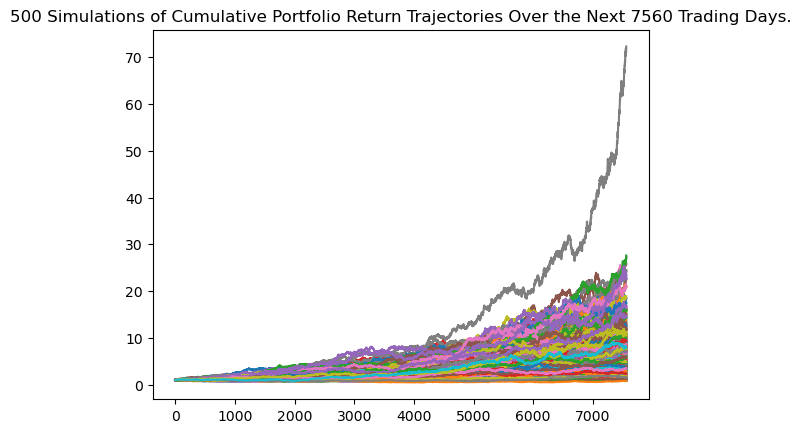

In [82]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_year_simulation.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

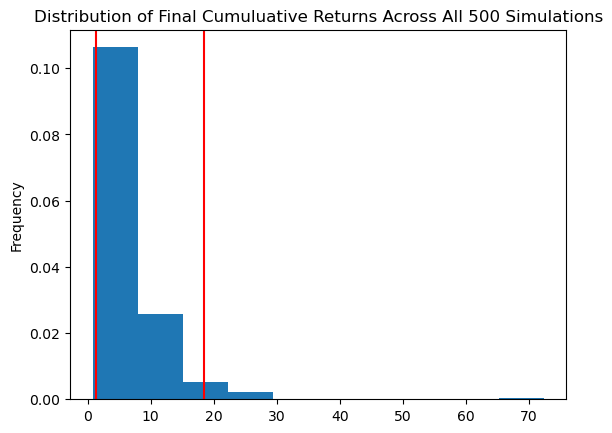

In [83]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_year_simulation.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [84]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirty_year_simulation.stat = thirty_year_simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
thirty_year_simulation.stat

count           500.000000
mean              6.250541
std               5.363543
min               0.814791
25%               2.966559
50%               4.831882
75%               7.743554
max              72.311747
95% CI Lower      1.348846
95% CI Upper     18.488604
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [85]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portfolio is ${total_stocks_bonds:.2f}")

The current balance of the stock and bond portfolio is $64558.30


In [86]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(thirty_year_simulation.stat[8]*total_portfolio,2)
ci_upper_thirty_cumulative_return = round(thirty_year_simulation.stat[9]*total_portfolio,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_portfolio:.2f} in the retirement portfolio over the next will 30 years will be within in the range of"
    f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")

There is a 95% chance that an initial investment of $109535.43 in the retirement portfolio over the next will 30 years will be within in the range of $147746.4 and $2025157.15.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [88]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

ten_year_simulation = MCSimulation(
    portfolio_data=financial_planner_df,
    weights=[0.80, 0.20],
    num_simulation=500,
    num_trading_days=252*10,
)

# Review the simulation input data
ten_year_simulation.portfolio_data.head()

SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2020-05-05 04:00:00+00:00  286.64  289.25  283.7134  286.15  79569939   
2020-05-06 04:00:00+00:00  288.05  288.46  283.7800  284.34  73632628   
2020-05-07 04:00:00+00:00  287.75  289.78  287.1300  287.70  75250412   
2020-05-08 04:00:00+00:00  291.09  292.95  289.8600  292.51  76622128   
2020-05-11 04:00:00+00:00  290.34  294.00  289.8800  292.62  79515876   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-05-05 04:00:00+00:00      459764  287.400201          NaN  116.96   
2020-05-06 04:00:00+00:00      436219  286.096273    -0.006325  116.44   
2020-05-07 04:00:00+00:00      422688  287.989956     0.011817  116.61   
2020-05-08 04:00:00+00:00      385501  291.461960     0.016719  116.68   
2020-05-11 04:00:00+00:00      419260  292.278175     0.000376  116.40   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2020-05-05 04:00:00+00:00  116.97  116.810  116.88  4611519       15146   
2020-05-06 04:00:00+00:00  116.71  116.300  116.41  6394949       20233   
2020-05-07 04:00:00+00:00  116.77  116.420  116.77  3786651       15963   
2020-05-08 04:00:00+00:00  116.76  116.350  116.46  3592658       15323   
2020-05-11 04:00:00+00:00  116.43  116.065  116.10  5249607       16091   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-05-05 04:00:00+00:00  116.879640          NaN  
2020-05-06 04:00:00+00:00  116.426742    -0.004021  
2020-05-07 04:00:00+00:00  116.641826     0.003093  
2020-05-08 04:00:00+00:00  116.492159    -0.002655  
2020-05-11 04:00:00+00:00  116.156165    -0.003091

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

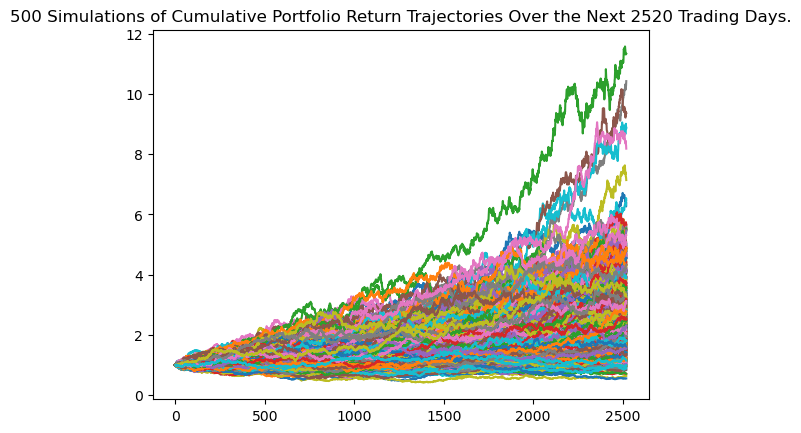

In [89]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

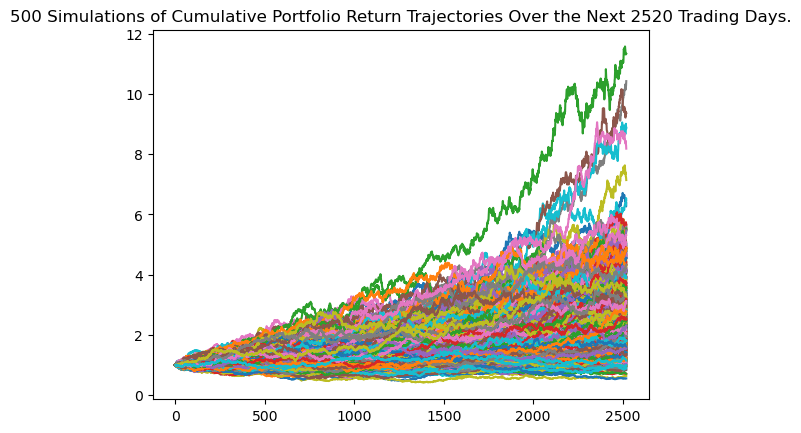

In [90]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

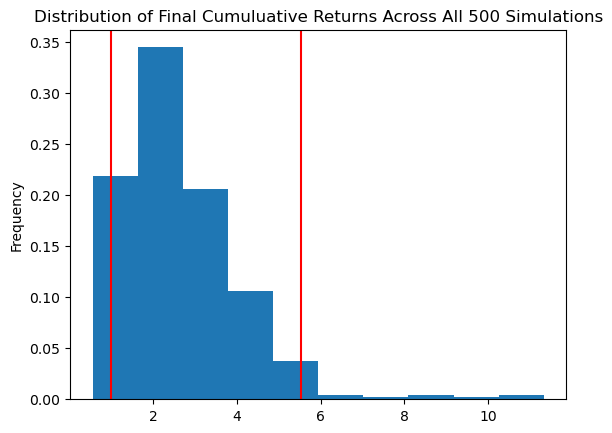

In [91]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_simulation.plot_distribution()

In [92]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_year_simulation_stat = ten_year_simulation.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
ten_year_simulation_stat

count           500.000000
mean              2.651656
std               1.356773
min               0.551789
25%               1.661135
50%               2.394547
75%               3.197372
max              11.333808
95% CI Lower      0.976176
95% CI Upper      5.538575
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [93]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the Stocks/Bonds Portfolio is ${total_stocks_bonds:.2f}")


The current balance of the Stocks/Bonds Portfolio is $64558.30


In [94]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_year_simulation_stat[8]*total_portfolio,2)
ci_upper_ten_cumulative_return = round(ten_year_simulation_stat[9]*total_portfolio,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_portfolio:.2f} in the retirement portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")



There is a 95% chance that an initial investment of $109535.43 in the retirement portfolio over the next 10 years will end within in the range of $106925.86 and $606670.21.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [ ]:
No it wont let the members retire sooner if the weigts was more heavily on stocks.